In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as m

In [46]:
file = pd.read_csv('share.csv')
file.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [47]:
#Replacing null values with just first value
file = file.replace('*',np.nan)
file = file.replace('**',np.nan)
col = list(file)
for i in range(3,len(col)):
    file[col[i]] = file[col[i]].replace(np.nan,file[col[i]][1])

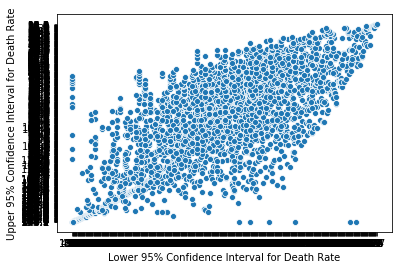

In [56]:
X = file[col[4]]
y = file[col[5]]
sns.scatterplot(X,y)
plt.show()

In [76]:
reg = LinearRegression()
X = np.array(X)
X=X.reshape(-1,1)
y = np.array(y)
y=y.reshape(-1,1)
reg.fit(X,y)
y_pred = reg.predict(X)
score = reg.score(y,y_pred)
mse = m(y,y_pred)
print(np.sqrt(mse))

12.881456863793662


Exception: Data must be 1-dimensional